In [5]:
%matplotlib inline

import sys
from enum import Enum
from collections import OrderedDict

import csv, math, string
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

from scrapers import logger
from Truth import Page, get_truth_value, get_truth_value_old, get_utfidf


from sklearn.metrics import roc_curve, confusion_matrix, classification_report


from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score

logger.ignorewarnings = True


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Leryc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


C:\Users\Leryc\Envs\thesis\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [39]:
"""New Truth Value method"""
import copy
import time
def get_truth_matrices(df):
    """
    Returns 3 pandas dataframes:
        - metric_tfidf
        - umetric_tfidf
        - metric_old
    """
    metric_tfidf = copy.copy(df)
    umetric_tfidf = copy.copy(df)
    metric_old = copy.copy(df)
    for idx, rowidx in enumerate(df.index):
        start = time.time()
        print(f"[{idx+1}/{len(df.index)}] {rowidx}")
        for key in df.keys():
            metric_tfidf.loc[rowidx][key] = get_truth_value(metric_tfidf.loc[rowidx][key])
            umetric_tfidf.loc[rowidx][key] = get_utfidf(umetric_tfidf.loc[rowidx][key])
            metric_old.loc[rowidx][key] = get_truth_value_old(metric_old.loc[rowidx][key])
        print(f"Done {time.time()-start} seconds.")
    return (metric_tfidf.astype('float64'), umetric_tfidf.astype('float64'), metric_old.astype('float64'))
        



# Classification Task

Statements in the form of "Politician $p_{i}$ endorses ideology $i_{j}$ are considered. A matrix of all possible combinations of subjects and objects were then obtained. Each path in the matrix was evaluated to obtain its truth value.

Three different truth matrices are obtained:
1. Truth value matrix using metric closure, with TF-IDF and cosine similarity
2. Truth value matrix using ultrametric closure, with TF-IDF and cosine similarity
3. Truth value matrix using metric closure, using generality only (theoretical framework)

**Get truth matrices**

In [ ]:
df = pd.read_csv('data/out/i2.csv', sep=';', index_col=0)
mt, ut, mold = get_truth_matrices(df)

**Get target column**

In [14]:
def isDemocrat(entity):
    return entity.endswith('(R)')
y = [isDemocrat(x) for x in i1_mt.index]

Display the resulting matrix

In [17]:
i1_mt

,Anarchism,Antisemitism,Capitalism,Christianity,Communism,Conservatism,Democracy,Fascism,Feminism,Islamophobia,Left-wing politics,Liberalism,Marxism,Nationalism,Neo-Nazism,Protestantism,Right-wing politics,Secularism,Socialism,White supremacy
x-entity,,,,,,,,,,,,,,,,,,,,
Jo Bonner (R),0.071048,0.067143,0.054021,0.053941,0.066685,0.072421,0.058368,0.065525,0.044251,0.069056,0.063660,0.053091,0.059485,0.065946,0.096082,0.054214,0.068126,0.050647,0.073818,0.063966
Martha Roby (R),0.067763,0.063282,0.064275,0.055059,0.067058,0.098936,0.083081,0.077397,0.062446,0.057294,0.074704,0.075141,0.054051,0.060333,0.089473,0.058659,0.089053,0.064666,0.087194,0.065397
Mike Rogers (R),0.069972,0.066444,0.064401,0.050256,0.058977,0.055445,0.054687,0.070131,0.044306,0.056108,0.069981,0.060342,0.046575,0.076550,0.089277,0.061955,0.056137,0.051539,0.070631,0.057534
Robert Aderholt (R),0.099980,0.078978,0.073372,0.070627,0.093934,0.122361,0.084522,0.092721,0.059072,0.064086,0.092826,0.090079,0.060709,0.079224,0.133379,0.076984,0.105611,0.072566,0.100810,0.083287
Mo Brooks (R),0.086297,0.081946,0.081745,0.072008,0.090412,0.113233,0.091384,0.096122,0.056169,0.061632,0.089806,0.085677,0.059916,0.089592,0.118347,0.073699,0.095786,0.063528,0.104593,0.094316
Spencer Bachus (R),0.100407,0.098690,0.082538,0.064055,0.079346,0.100373,0.074001,0.098632,0.058758,0.062703,0.086813,0.102406,0.061127,0.080772,0.130216,0.070828,0.086591,0.060467,0.106993,0.077344
Terri Sewell (D),0.081813,0.071049,0.066778,0.070429,0.072794,0.073144,0.093722,0.077921,0.090062,0.058628,0.079154,0.085282,0.059050,0.068304,0.112245,0.076775,0.069545,0.066742,0.091240,0.087461
Paul Gosar (R),0.073900,0.076933,0.060413,0.053407,0.063058,0.089636,0.073900,0.087130,0.055009,0.060353,0.081180,0.079927,0.069425,0.077143,0.116479,0.060355,0.090820,0.058475,0.087414,0.073675
Trent Franks (R),0.091676,0.100869,0.060533,0.063766,0.062989,0.087103,0.078115,0.083471,0.071552,0.086748,0.090041,0.071589,0.055634,0.073957,0.112152,0.070156,0.091565,0.061034,0.093599,0.081838


**Classify the truth values into R or D using SVM**

Mean cross-validation accuracy: 0.69
             precision    recall  f1-score   support

      False  0.6941176471 0.6704545455 0.6820809249        88
       True  0.6914893617 0.7142857143 0.7027027027        91

avg / total  0.6927814796 0.6927374302 0.6925646220       179



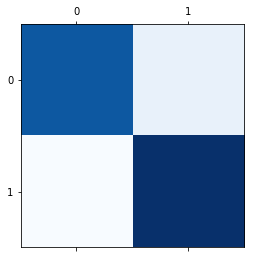

In [66]:
from sklearn.svm import SVC
svm_clf = SVC(C=2**14, kernel='linear')

from sklearn.model_selection import cross_val_score 
scoresw = cross_val_score(svm_clf,i1_mt,y,cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scoresw)))

ypred = cross_val_predict(svm_clf, i1_mt, y, cv=5)
print(classification_report(y, ypred, digits=10))
conf_mx = confusion_matrix(y, ypred)
plt.matshow(conf_mx,cmap=plt.cm.Blues)
plt.show()

Display ROC Curve

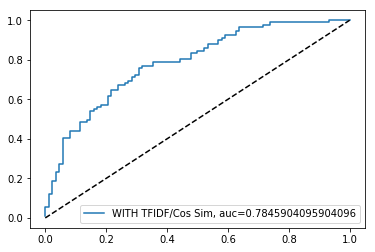

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_scores = cross_val_predict(svm_clf, i1_mt, y, cv=15, method="decision_function")
fpr, tpr, thresholds = roc_curve(y, y_scores)

fpr, tpr, thresh = roc_curve(y, y_scores)
auc = roc_auc_score(y, y_scores)
plt.plot(fpr,tpr,label="WITH TFIDF/Cos Sim, auc="+repr(auc))

plt.plot([0,1],[0,1],'k--')

plt.legend(loc=0)


## Validation Using previous algo

Mean cross-validation accuracy: 0.50
             precision    recall  f1-score   support

      False  0.5243902439 0.4886363636 0.5058823529        88
       True  0.5360824742 0.5714285714 0.5531914894        91

avg / total  0.5303343386 0.5307262570 0.5299333664       179



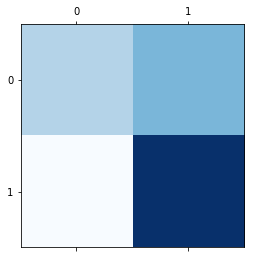

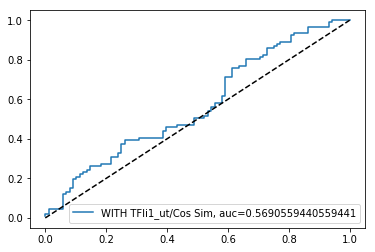

In [63]:
def isDemocrat(entity):
    return entity.endswith('(R)')

i1_ut


from sklearn.svm import SVC
svm_clf = SVC(C=2**14, kernel='linear')

from sklearn.model_selection import cross_val_score 
scoresw = cross_val_score(svm_clf,i1_ut,y,cv=15)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scoresw)))

ypred = cross_val_predict(svm_clf, i1_ut, y, cv=5)
print(classification_report(y, ypred, digits=10))
conf_mx = confusion_matrix(y, ypred)
plt.matshow(conf_mx,cmap=plt.cm.Blues)
plt.show()

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

yw_scores = cross_val_predict(svm_clf, i1_ut, y, cv=15, method="decision_function")
fpr, tpr, thresholds = roc_curve(y, yw_scores)

fpr, tpr, thresh = roc_curve(y, yw_scores)
auc = roc_auc_score(y, yw_scores)
plt.plot(fpr,tpr,label="WITH TFIi1_ut/Cos Sim, auc="+repr(auc))

plt.plot([0,1],[0,1],'k--')

plt.legend(loc=0)


## Classification Task using UltrametricTFIDF


Mean cross-validation accuracy: 0.69
             precision    recall  f1-score   support

      False  0.7285714286 0.5795454545 0.6455696203        88
       True  0.6605504587 0.7912087912 0.7200000000        91

avg / total  0.6939909355 0.6871508380 0.6834085284       179



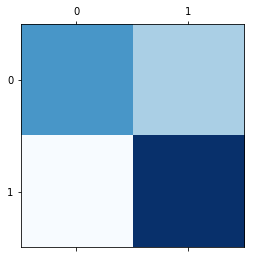

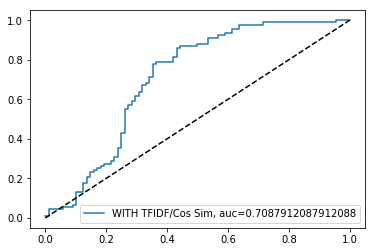

In [107]:
def isDemocrat(entity):
    return entity.endswith('(R)')

from sklearn.svm import SVC
svm_clf = SVC(C=2**14, kernel='linear')

from sklearn.model_selection import cross_val_score 
scoresw = cross_val_score(svm_clf,i1_mold,y,cv=15)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scoresw)))

ypred = cross_val_predict(svm_clf, i1_mold, y, cv=15)
print(classification_report(y, ypred, digits=10))
conf_mx = confusion_matrix(y, ypred)
plt.matshow(conf_mx,cmap=plt.cm.Blues)
plt.show()

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_scores = cross_val_predict(svm_clf, i1_mold, y, cv=15, method="decision_function")
fpr, tpr, thresholds = roc_curve(y, y_scores)

fpr, tpr, thresh = roc_curve(y, y_scores)
auc = roc_auc_score(y, y_scores)
plt.plot(fpr,tpr,label="WITH TFIDF/Cos Sim, auc="+repr(auc))

plt.plot([0,1],[0,1],'k--')

plt.legend(loc=0)


# Validation on Factual Statements

Simple statements various subject areas were tested. Statements in the form of "$p_{i}$ was married to $s_{j}$" were considered, where $p_{i}$ is a US president, and $s_{j}$ is a spouse of a US president. A matrix of statements was then obtained by getting all the combinations of subjects and objects.

In [7]:
df = pd.read_csv('data/out/t2_output.csv', sep=';', index_col=0)
print(df.shape)

(17, 17)


Map the truth value function to the Path matrix.

In [41]:
mold = mold.astype('float64')

Get the confusion matrix of the shit.

C:\Users\Leryc\Envs\thesis\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


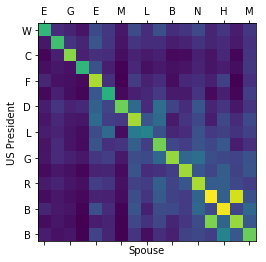

In [45]:
vmin = 0
vmax = 1
color = plt.cm.viridis

%matplotlib inline
fig, ax = plt.subplots(1,1)
plt.xlabel('Spouse')
plt.ylabel('US President')

ax.matshow(new, cmap=color)
ax.set_xticklabels([' ']+[x[0] for x in df.keys()][::2])
ax.set_yticklabels([' ']+[x[0] for x in df.index][::2])
fig.show()


C:\Users\Leryc\Envs\thesis\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


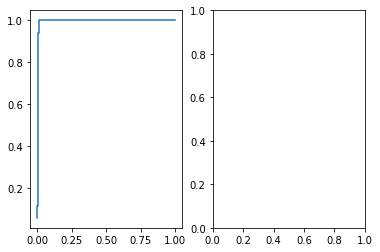

In [69]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


#ay_score = cross_val_predict(svm_clf, conf_mx, y, cv=15, method="decision_function")

roc1_fig, roc1_ax = plt.subplots(1,2)
roc1_ax[0].plot(fprH, tprH)

roc1_fig.show()
#ax.matshow(new, cmap=color)
#ax.set_xticklabels([' ']+[x[0] for x in df.keys()][::2])
#ax.set_yticklabels([' ']+[x[0] for x in df.index][::2])
#fig.show()

#vfs_y_score = new.values.flatten()
#fprH, tprH, threshH = roc_curve(vfs_y, vfs_y_score)
#print(fprH)
#print(tprH)
#auc = roc_auc_score(conf_mx, conf_mx)
#plt.tightlayout()
plt.show()

In [46]:
vfs_y_score

NameError: name 'vfs_y_score' is not defined

In [55]:
y_true = pd.DataFrame().reindex_like(conf_mx)
for idx, rowidx in enumerate(y_true.index):
    for idx2, key in enumerate(y_true.keys()):
        if idx==idx2:
            y_true.loc[rowidx][key] = int(1)
        else:
            y_true.loc[rowidx][key] = int(0)
            
            
for x in y_true:
    y_true[x] = y_true[x].astype('bool')

    
vfs_y = y_true.values.flatten()
vfs_y_score = conf_mx.values.flatten()

In [134]:
vfs_y

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,

# Store the Necessary Variables

Save the loaded shts

In [ ]:
mold.to_csv('data/out/degmatrices/i2_mold.csv', sep=';')
mt.to_csv('data/out/degmatrices/i2_mt.csv', sep=';')
ut.to_csv('data/out/degmatrices/i2_ut.csv', sep=';')

Load the shits, and concat

In [35]:
i1_mt =  pd.read_csv('data/out/degmatrices/i1_mt.csv', sep=';', index_col=0)
i2_mt =  pd.read_csv('data/out/degmatrices/i2_mt.csv', sep=';', index_col=0)
i1_mt = pd.concat([i1_mt,i2_mt])

i1_ut =  pd.read_csv('data/out/degmatrices/i1_ut.csv', sep=';', index_col=0)
i2_ut =  pd.read_csv('data/out/degmatrices/i2_ut.csv', sep=';', index_col=0)
i1_ut = pd.concat([i1_ut,i2_ut])

i1_mold =  pd.read_csv('data/out/degmatrices/i1_mold.csv', sep=';', index_col=0)
i2_mold =  pd.read_csv('data/out/degmatrices/i2_mold.csv', sep=';', index_col=0)
i1_mold = pd.concat([i1_mold,i2_mold])

i1_mold.to_csv('data/out/degmatrices/ide_mold.csv', sep=';')

In [4]:
i1_ut

,Anarchism,Antisemitism,Capitalism,Christianity,Communism,Conservatism,Democracy,Fascism,Feminism,Islamophobia,Left-wing politics,Liberalism,Marxism,Nationalism,Neo-Nazism,Protestantism,Right-wing politics,Secularism,Socialism,White supremacy
x-entity,,,,,,,,,,,,,,,,,,,,
Jo Bonner (R),0.102017,0.094920,0.093597,0.078038,0.092170,0.095047,0.092239,0.087296,0.079831,0.098527,0.098353,0.089213,0.091595,0.098004,0.127569,0.079494,0.088735,0.085901,0.099131,0.098236
Martha Roby (R),0.097020,0.096831,0.097479,0.079037,0.102828,0.120613,0.115207,0.098620,0.095510,0.089833,0.101187,0.107602,0.085367,0.087447,0.120042,0.094016,0.108972,0.096874,0.117155,0.097236
Mike Rogers (R),0.093681,0.088229,0.092173,0.079307,0.093878,0.084451,0.080920,0.097501,0.086108,0.077051,0.088153,0.101547,0.090375,0.094793,0.116465,0.081549,0.083565,0.072221,0.103181,0.091942
Robert Aderholt (R),0.126222,0.111449,0.105925,0.093489,0.115161,0.144552,0.116576,0.113465,0.092445,0.096032,0.118748,0.121776,0.091478,0.105543,0.159645,0.110862,0.125179,0.104237,0.130288,0.114099
Mo Brooks (R),0.121416,0.101411,0.103984,0.094801,0.113692,0.134572,0.119686,0.117920,0.089843,0.093774,0.115810,0.117575,0.090743,0.111428,0.147982,0.107790,0.115549,0.095824,0.133955,0.114624
Spencer Bachus (R),0.129011,0.116816,0.107047,0.087299,0.109429,0.122012,0.103540,0.119229,0.096798,0.098723,0.120537,0.122405,0.086513,0.112202,0.161637,0.107141,0.106574,0.089811,0.140988,0.100966
Terri Sewell (D),0.111119,0.104007,0.099786,0.093302,0.108334,0.104643,0.125362,0.108661,0.121477,0.091037,0.105480,0.117198,0.089943,0.095035,0.142045,0.110666,0.100328,0.098795,0.121047,0.115214
Paul Gosar (R),0.106561,0.096542,0.094572,0.086047,0.094098,0.111583,0.106165,0.108029,0.086383,0.095395,0.115191,0.114128,0.098605,0.111187,0.147128,0.088437,0.110696,0.088377,0.116723,0.107260
Trent Franks (R),0.120782,0.122006,0.094680,0.095542,0.094033,0.109133,0.110132,0.104484,0.099004,0.113875,0.123572,0.106353,0.090529,0.108215,0.142929,0.097741,0.122754,0.090755,0.124204,0.109500


In [ ]:

l = ['i1', 'i2']
map_mt = lambda x: 'data/out/degmatrices/'+x+'_mt.csv'
map_ut = lambda x: 'data/out/degmatrices/'+x+'_ut.csv'
map_mold = lambda x: 'data/out/degmatrices/'+x+'_mold.csv'
def mergeide(li):

    c_mt = None
    c_ut = None
    c_mold = None
    paths_mt = list(map(map_mt, l))
    paths_ut = list(map(map_ut, l))
    paths_ut = list(map(map_mold, l))
    for x in paths_mt:
        pd.concat()
    
    
    
    
list(map(map_mt, l))

In [ ]:
i1_mt = pd.read_csv('data/out/degmatrices/ide.csv', sep=';', index_col=0)
i1_mt = pd.read_csv('data/out/degmatrices/ide.csv', sep=';', index_col=0)

In [38]:
i1_mold.shape

(179, 20)

In [112]:
y

[True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 T